In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Covid_data.csv')
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [20]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [21]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [4]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

<Axes: xlabel='gender'>

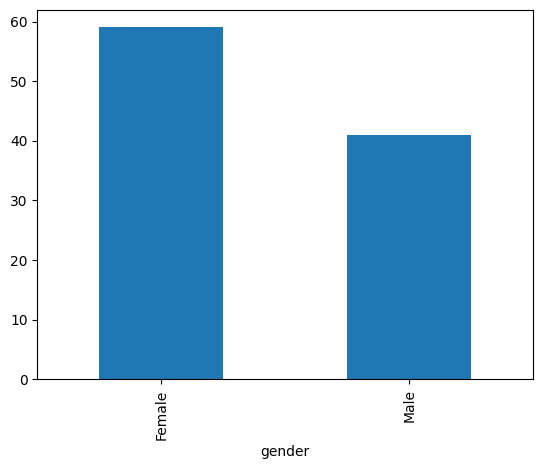

In [5]:
df['gender'].value_counts().plot(kind='bar')

In [6]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

Without use Column Transformer

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=('has_covid')), df['has_covid'], test_size=0.2)

In [23]:
X_train.shape, X_test.shape,
X_train

,age,gender,fever,cough,city
18,64,Female,98.0,Mild,Bangalore
23,80,Female,98.0,Mild,Delhi
30,15,Male,101.0,Mild,Delhi
69,73,Female,103.0,Mild,Delhi
83,17,Female,104.0,Mild,Kolkata
...,...,...,...,...,...
12,25,Female,99.0,Strong,Kolkata
36,38,Female,101.0,Mild,Bangalore
87,47,Male,101.0,Strong,Bangalore
65,69,Female,102.0,Mild,Bangalore


## 1. Aam Zindgi

In [25]:
#adding simple imputer for Fever column
from sklearn.impute import SimpleImputer
si=SimpleImputer()
X_train_fever=si.fit_transform(X_train[['fever']])
#also for test data
X_test_fever=si.transform(X_test[['fever']])
X_train_fever

array([[ 98.        ],
       [ 98.        ],
       [101.        ],
       [103.        ],
       [104.        ],
       [100.97183099],
       [ 98.        ],
       [103.        ],
       [ 98.        ],
       [ 98.        ],
       [100.        ],
       [104.        ],
       [ 98.        ],
       [ 98.        ],
       [104.        ],
       [102.        ],
       [101.        ],
       [ 98.        ],
       [103.        ],
       [102.        ],
       [ 98.        ],
       [100.        ],
       [101.        ],
       [104.        ],
       [104.        ],
       [104.        ],
       [101.        ],
       [ 99.        ],
       [102.        ],
       [ 99.        ],
       [102.        ],
       [104.        ],
       [101.        ],
       [104.        ],
       [103.        ],
       [103.        ],
       [ 98.        ],
       [ 99.        ],
       [ 98.        ],
       [103.        ],
       [ 99.        ],
       [101.        ],
       [ 98.        ],
       [100

In [10]:
X_train_fever.shape

(80, 1)

In [26]:
#Ordinal Encoding --> cough
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough=oe.fit_transform(X_train[['cough']])
# also for test data
X_test_cough=oe.transform(X_test[['cough']])

In [28]:
# One Hot Encoding --> city,Gender
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first', sparse_output=False)
X_train_city_gender=ohe.fit_transform(X_train[['city','gender']])
#also for test
X_test_city_gender=ohe.transform(X_test[['city','gender']])

X_train_city_gender

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 1.],
       [0., 1., 0., 1.],


In [30]:
X_train_city_gender.shape

(80, 4)

In [31]:
# Extracting Age 
X_train_age=X_train.drop(columns=['gender','fever','cough','city']).values
# also for test
X_test_age=X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age

array([[64],
       [80],
       [15],
       [73],
       [17],
       [71],
       [ 5],
       [83],
       [69],
       [34],
       [19],
       [44],
       [73],
       [65],
       [51],
       [82],
       [83],
       [10],
       [16],
       [24],
       [81],
       [55],
       [19],
       [25],
       [51],
       [18],
       [14],
       [66],
       [64],
       [14],
       [ 5],
       [ 6],
       [51],
       [56],
       [50],
       [69],
       [31],
       [72],
       [23],
       [60],
       [65],
       [34],
       [71],
       [ 5],
       [79],
       [20],
       [10],
       [60],
       [84],
       [49],
       [80],
       [54],
       [65],
       [ 8],
       [65],
       [34],
       [42],
       [82],
       [46],
       [81],
       [27],
       [75],
       [16],
       [74],
       [20],
       [38],
       [13],
       [11],
       [33],
       [20],
       [12],
       [23],
       [64],
       [34],
       [83],
       [25],
       [38],

In [32]:
X_train_transformed=np.concatenate((X_train_age,X_train_fever,X_train_city_gender,X_train_cough),axis=1)
X_test_transformed=np.concatenate((X_test_age,X_test_fever,X_test_city_gender,X_test_cough),axis=1)
X_train_transformed.shape
X_train_transformed

array([[ 64.        ,  98.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 80.        ,  98.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 15.        , 101.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ],
       [ 73.        , 103.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 17.        , 104.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ],
       [ 71.        , 100.97183099,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ],
       [  5.        ,  98.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   1.        ],
       [ 83.        , 103.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   0.        ],
       [ 69.        ,  98.        ,   0.        ,   0.        ,
          1.    

In [33]:
X_train_transformed.shape

(80, 7)

## 2.With Column Transformer

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [16]:
from sklearn.compose import ColumnTransformer


In [34]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [42]:
# Ensure the columns specified in the ColumnTransformer are present in X_train
# X_train_transformed = transformer.fit_transform(X_train[['fever', 'cough', 'gender', 'city', 'age']])
# X_train_transformed.shape

# Fit the transformer on the training data and transform it
transformer_data= transformer.fit_transform(X_train)
transformer_data.shape


(80, 7)

In [44]:
# X_test_transformed = transformer.transform(X_test[['fever', 'cough', 'gender', 'city', 'age']])
# X_test_transformed.shape
# Check the transformed data
transformer.fit_transform(X_test)
transformer_data.shape


(80, 7)